
Measurement of Temperature of the CMB Radiation at 19GHz:

The Cosmic Background Radiation is radiation left over from approximately 300,000 years after the Big Bang. Measuring the temperature allows us to map out the universe during early times. This experiment uses a radiometer to measure the intensity of the sky at 19GHz and calibrates to known blackbody emitters to account for gain. Using the second data run where we calibrated with angle and taking the average of the βs for the two calibrations, we measure the temperature of the CMB to be TCMB = 12.09 ± 1.74 ± 5.41 K with a χ2 = 7.48. The theoretical value of 2.725 K falls within two standard deviations of the mean.

For more information: 


In [24]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as ss
import scipy.constants as sc
import math
import numpy


Horn Beam Data:
-Measures Power from 






CMB Data:

Calibration 1: We switch between the warm load and cold load, an Eccosorb over a styrofoam box of another Eccosorb submerged approximately 2 inches underneath liquid Nitrogen.

Data Run 1: Taking measurements of Power at various angles from the zenith. (No chopping)

Data Run 2: Taking measurements of Power and Temperature for various angles from the zenith. (with chopping)
            warm load is with the Eccosorb

Calibration 2: Switching between the warm load and cold load, Eccosorb over the Potter horn, right after Data Run 2.


In [25]:
def myline(x, a, b):
    y = a*x+b
    return y

def mychisquare(data, model, error):
    cs=0
    for i in range(0, len(data)):
        cs += (((data[i])-model[i])**2)/((error[i])**2)
        
    return cs

def mychisquare_remove8(data, model,error):
    #Was difficult to remove data point from panda series so I made a seperate function
    cs=0
    for i in range(0,len(data)):
        if i==8:
            continue
        cs += (((data[i])-model[i])**2)/((error[i])**2) 
    return cs

def mychisquare_index3(data, model,error):
    #Was difficult to remove data point from panda series so I made a seperate function
    cs=0
    for i in range(3,len(data)):
        cs += (((data[i])-model[i])**2)/((error[i])**2) 
    return cs

sectheta = 1/numpy.cos(dfr2['Angle']*numpy.pi/180)

In [26]:
#First Calibration
dfc1 = pd.read_csv('CMB - Calibration1-2.csv') #dfc1 = pd.read_csv('CMB - Calibration1-2.csv')

#Second Calibration
dfc2 = pd.read_csv('CMB - Calibration2.csv') #dfc2 = pd.read_csv('CMB - Calibration2.csv')

#First Run
dfr1 = pd.read_csv('CMB - DataRun1-2.csv')

#Second Run
dfr2 = pd.read_csv('CMB - DataRun2.csv')



dfr2

,Angle,Cold(uW),Warm(uW),Warm_T,Cold_T
0,1.10,0.3894,1.032,NaN,NaN
1,10.00,0.4028,1.082,NaN,NaN
2,17.70,0.3973,1.074,NaN,NaN
3,24.20,0.4089,1.075,280.60,80.0
4,30.00,0.4050,1.078,280.55,80.0
5,36.30,0.4060,1.085,280.49,80.0
6,45.50,0.4133,1.074,280.27,80.0
7,51.65,0.4093,1.053,279.77,80.0
8,55.60,0.4327,1.065,279.15,80.0
9,58.80,0.4236,1.046,278.60,80.0


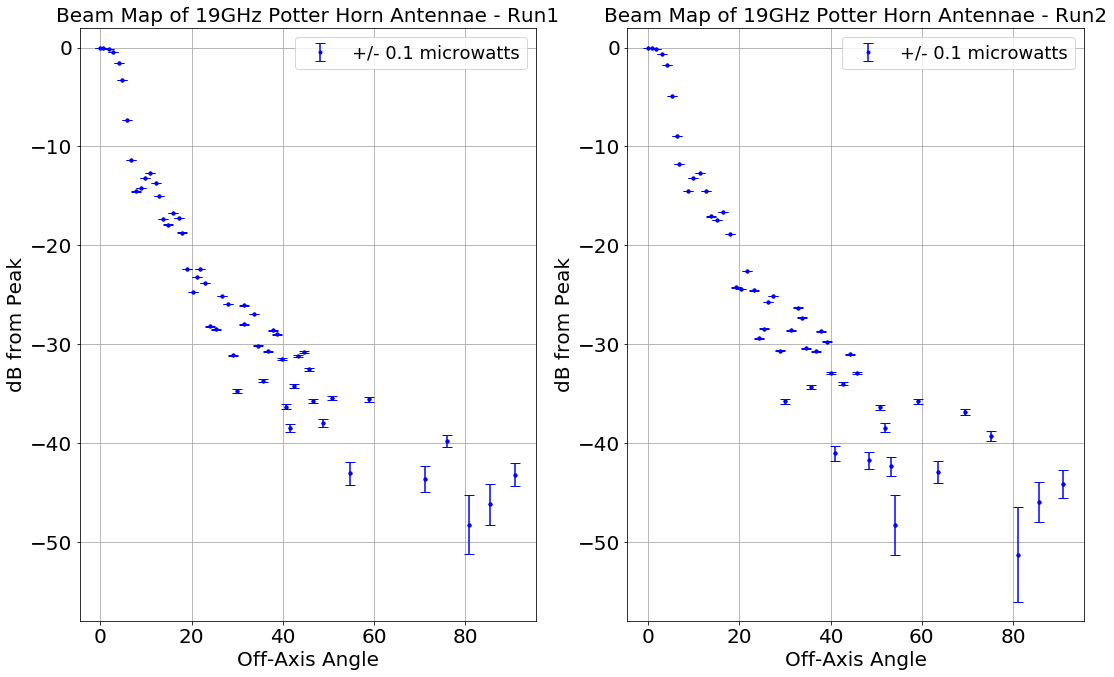

In [27]:
#error of 0.1 microwatts
dfhorn1 = pd.read_csv('CMB - HornBeam-2.csv')
plt.figure(1,figsize=(18,24))
plt.subplot(221)
plt.plot(dfhorn1['Angle+35.45'], dfhorn1['dB'], '.b', label='_nolegend_')
plt.xlabel("Off-Axis Angle", size=20)
plt.ylabel("dB from Peak", size=20)
plt.title("Beam Map of 19GHz Potter Horn Antennae - Run1", size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.ylim(-58,2)
new_err=[]
for i in range(0,len(dfhorn1['dB'])):
    new_err.append(10*numpy.log10((dfhorn1['Subtract lowest Power +0.1'][i]+0.1)/dfhorn1['Subtract lowest Power +0.1'][i]))
    
plt.errorbar(dfhorn1['Angle+35.45'],dfhorn1['dB'], new_err,fmt='.b', capsize = 5, 
             label = "+/- 0.1 microwatts")
plt.legend(loc='upper right', prop={'size': 18})
plt.grid(b=True, which='both', color='0.65', linestyle='-')


#error of 0.1 microwatts
dfhorn1 = pd.read_csv('CMB - HornBeam2.csv')
plt.subplot(222)
#plt.figure(2,figsize=(9,12))
plt.plot(dfhorn1['Angle+35.45'], dfhorn1['dB'], '.b', label='_nolegend_')
plt.xlabel("Off-Axis Angle", size=20)
plt.ylabel("dB from Peak", size=20)
plt.title("Beam Map of 19GHz Potter Horn Antennae - Run2", size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.ylim(-58,2)
new_err=[]
for i in range(0,len(dfhorn1['dB'])):
    new_err.append(10*numpy.log10((dfhorn1['Subtract lowest Power +0.1'][i]+0.1)/dfhorn1['Subtract lowest Power +0.1'][i]))
    
plt.errorbar(dfhorn1['Angle+35.45'],dfhorn1['dB'], new_err,fmt='.b', capsize = 5, 
             label = "+/- 0.1 microwatts")
plt.legend(loc='upper right', prop={'size': 18})
plt.grid(b=True, which='both', color='0.65', linestyle='-')

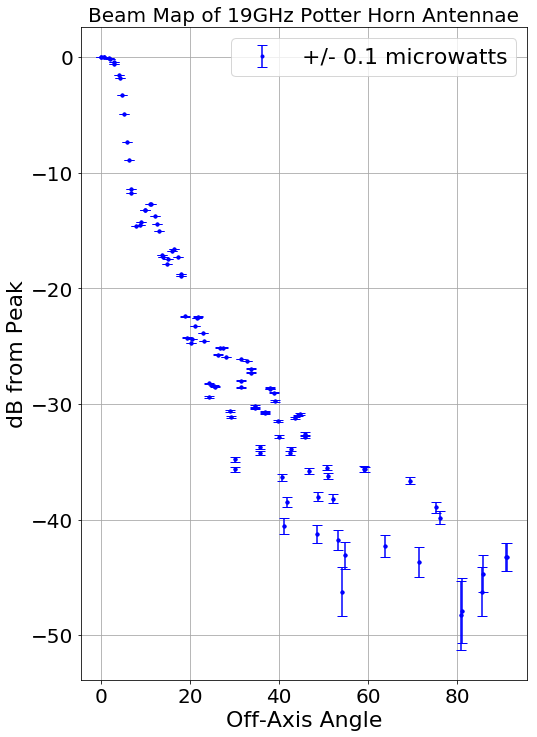

In [28]:
#error of 0.1 microwatts
dfhorn1 = pd.read_csv('CMB - HornBeam-4.csv')
plt.figure(2,figsize=(8,12))
plt.plot(dfhorn1['Angle+35.45'], dfhorn1['dB'], '.b',label='_nolegend_')
plt.xlabel("Off-Axis Angle", size=22)
plt.ylabel("dB from Peak", size=22)
plt.title("Beam Map of 19GHz Potter Horn Antennae", size=20)
plt.xticks(size=20)
plt.yticks(size=20)
new_err=[]
for i in range(0,len(dfhorn1['dB'])):
    new_err.append(10*numpy.log10((dfhorn1['Subtract lowest Power +0.1'][i]+0.1)/dfhorn1['Subtract lowest Power +0.1'][i]))
    
plt.errorbar(dfhorn1['Angle+35.45'],dfhorn1['dB'], new_err,fmt='.b', capsize = 5, 
             label = "+/- 0.1 microwatts")
plt.legend(loc='upper right', prop={'size': 22})
plt.grid(b=True, which='both', color='0.65', linestyle='-')

The radiometer was calibrated at the beginning and the end of the experiment by comparing readings of an approximately 80 K blackbody submerged in liquid nitrogen in a styrofoam box to readings of a blackbody at ambient Temperature. These calibrations will be used to measure our sky temperature later from the data runs.

0    0.5557
1    0.5560
2    0.5570
3    0.5570
0    1.0700
1    1.0840
2    1.0770
3    1.0900
dtype: float64
[ 387.64888181 -135.64136682] [ 381.54422738 -136.26170997]
0.015747896412823717
-0.004573406865076123
384.5965545930835 -135.9515383955642
[1.12476325 0.9692146 ] [4.36651288 3.75190615]


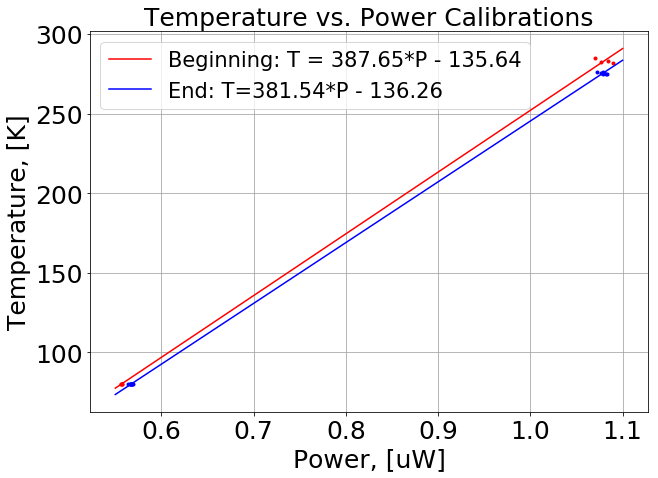

In [52]:
#Gain Calibration beginning and end

#Beginning
p_guessc1=[0.25,75.]
plt.figure(figsize=(10,7))

plt.plot(dfc1['Cold(uW)'],dfc1['T_cold'], '.r' ,label='_nolegend_')#dfc1['T_cold']
plt.plot(dfc1['Warm(uW)'],dfc1['T_warm'], '.r' ,label='_nolegend_')
xdata = dfc1['Cold(uW)'].append(dfc1['Warm(uW)'])
print(xdata)
paramsc1, covc1 = curve_fit(f = myline, 
                            xdata = dfc1['Cold(uW)'].append(dfc1['Warm(uW)']),
                            ydata = dfc1['T_cold'].append(dfc1['T_warm']) ,
                            p0= p_guessc1 )

x=numpy.linspace(0.55,1.1,100)
plt.plot(x, x*paramsc1[0]+paramsc1[1], linestyle="solid", color="red", 
         label="Beginning: T = 387.65*P - 135.64")


#End
p_guessc2=[0.25,75.]
plt.figure(1)
plt.plot(dfc2['Cold(uW)'],dfc2['T_cold'], '.b' ,label='_nolegend_')
plt.plot(dfc2['Warm(uW)'],dfc2['T_warm'], '.b' ,label='_nolegend_')


paramsc2, covc2 = curve_fit(f = myline, 
                            xdata = dfc2['Cold(uW)'].append(dfc2['Warm(uW)']),
                            ydata = dfc2['T_cold'].append(dfc2['T_warm']) ,
                            p0= p_guessc2)
print(paramsc1, paramsc2)

x=numpy.linspace(0.55,1.1,100)
plt.plot(x, x*paramsc2[0]+paramsc2[1], linestyle="solid", color="blue", 
         label="End: T=381.54*P - 136.26")

                                        
alpha_diff = (paramsc1[0]-paramsc2[0])/paramsc1[0]
beta_diff = (paramsc1[1]-paramsc2[1])/paramsc1[1]
print(alpha_diff)
print(beta_diff)

alpha5050 = paramsc1[0]*0.5 + paramsc2[0]*0.5
beta5050 = paramsc1[1]*0.5 + paramsc2[1]*0.5
alpha7525 = paramsc1[0]*0.75 + paramsc2[0]*0.25
beta7525 = paramsc1[1]*0.75 + paramsc2[1]*0.25
alpha2575 = paramsc1[0]*0.25 + paramsc2[0]*0.75
beta2575 = paramsc1[1]*0.25 + paramsc2[1]*0.75
print(alpha5050, beta5050)
plt.xlabel("Power, [uW]", size=25)
plt.ylabel("Temperature, [K]", size=25)
plt.title("Temperature vs. Power Calibrations", size=25)
plt.xticks(size=25)
plt.yticks(size=25)
plt.legend(loc="best", prop={'size': 21})
plt.grid(b=True, which='both', color='0.65', linestyle='-')
error = numpy.sqrt(numpy.diag(covc2)) #[1.12476325 0.9692146 ]
error2 = numpy.sqrt(numpy.diag(covc1))#[4.36651288 3.75190615]
print(error, error2)
#Alpha is 1/Gain
#Beta is T of LNB

In [30]:
#Errors - will be used for curve fitting and chi squared
e1 = alpha5050 * numpy.std(dfc1['Cold(uW)'])#Variation from cold load
e2 = alpha5050 * numpy.std(dfc1['Warm(uW)'])#Variation from warm load
e3 = alpha5050 * numpy.std(dfc2['Cold(uW)'])#Variation from cold load
e4 = alpha5050 * numpy.std(dfc2['Warm(uW)'])#Variation from warm load
e5 = alpha5050 * 0.001 #Power readings fluctuated by about +/- 1 nW or +/- 0.001 uW
e6 = 0.1 #The noise level for the Agilent 8481A power detector head is about 0.1 μW

#Add in quadrature
err = numpy.sqrt((0.25*(e1**2 + e2**2 + e3**2 + e4**2) + e5**2 + e6**2))#1.629252781430547
err2575 = numpy.sqrt((0.25**2)*(e1**2 + e2**2) + (0.75**2)*(e3**2 + e4**2) + e5**2 + e6**2)#1.262693499801783
err0100 = numpy.sqrt((e3**2 + e4**2) + e5**2 + e6**2)#1.3351405098645341
err7525 = numpy.sqrt((0.75**2)*(e1**2 + e2**2) + (0.25**2)*(e3**2 + e4**2) + e5**2 + e6**2)#2.2277363926537235


The first data run was done without calibrating to the reference load at each angle. 
Convert power measurements to temperature using alpha and beta from gain calibrations.
Plot temperature vs. secθ where secθ is a mea- sure of airmass. 
We find the Temperature of the CMB by extrapolating our best fit line to zero airmass. 



For the first data run, TCMB = 10.55 ± 1.41 ± 5.41 K with χ2 = 2.93. 


Doing the same for the second data run, TCMB =10.89±1.32±5.41K with χ2 = 3.08.

[ 8.19789957 10.54684477]
[0.8619326  1.40987247]
2.933586804084089
[[ 0.53300687 -0.90778169]
 [-0.90778169  1.71197715]]
[ 7.45821601 10.89119974]
[0.73007319 1.30842545]
3.081610378065055


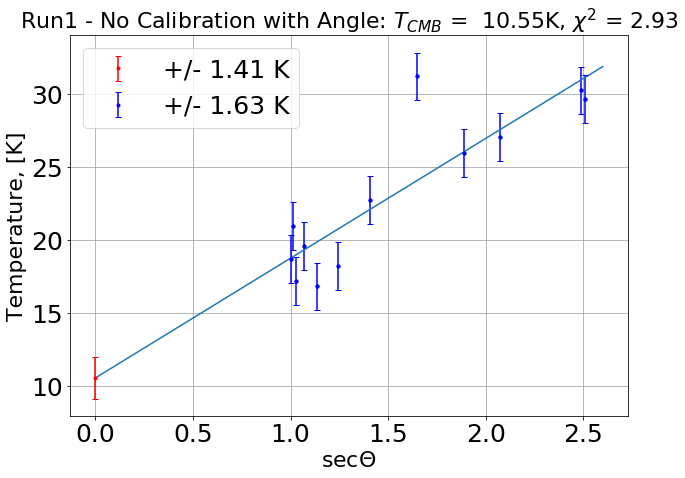

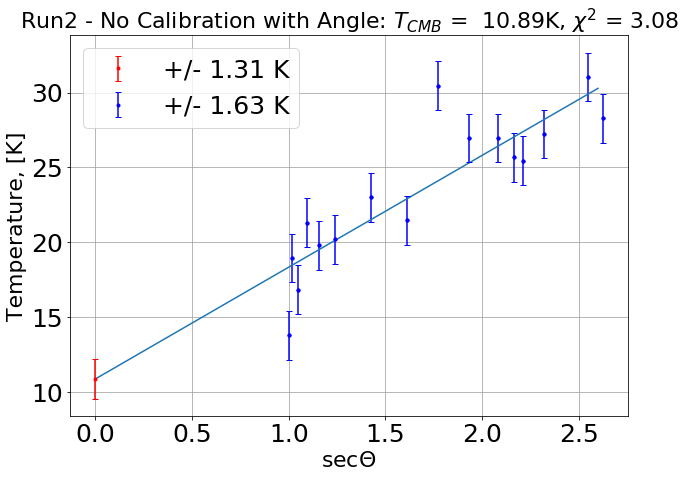

In [31]:
#Data Run 1 with 50/50

sectheta1 = 1/numpy.cos(dfr1['Angle']*numpy.pi/180)
T_r1__5050 = dfr1['Power(uW)']*alpha5050 + beta5050
T_err_r1_5050 = [err]*len(dfr1['Angle'])

plt.figure(0, figsize=(10,7))
plt.plot(sectheta1, T_r1__5050,'.b', label = '_nolegend_')
plt.xlabel("sec"+r"$\Theta$", size=22)
plt.ylabel("Temperature, [K]", size=22)
plt.title("Run1 - No Calibration with Angle:"+" $T_{CMB}$ =  10.55K, $\chi^2$ = 2.93" , size=22)
plt.xticks(size=25)
plt.yticks(size=25)

plt.grid(b=True, which='both', color='0.65', linestyle='-')

pguess_r1_5050 = [10., 6.]
params_r1_5050, cov_r1_5050 = curve_fit(f = myline, 
                            xdata=sectheta1,
                                ydata=T_r1__5050,sigma=T_err_r1_5050, absolute_sigma = True,
                            p0= pguess_r1_5050)

print(params_r1_5050)
Tcmb_error_r1_5050 = numpy.sqrt(numpy.diag(cov_r1_5050))
print(Tcmb_error_r1_5050)
x=numpy.linspace(0,2.6,100)
plt.plot(x, params_r1_5050[0]*x + params_r1_5050[1], linestyle='solid')
plt.errorbar(0, params_r1_5050[1], yerr=Tcmb_error_r1_5050[1], fmt='.r', capsize = 3, label = "+/- 1.41 K")

plt.errorbar(sectheta1, T_r1__5050, yerr=T_err_r1_5050, fmt='.b', capsize = 3, label = "+/- 1.63 K")
plt.legend(loc="best", prop={'size': 25})

T_chisquare = mychisquare(T_r1__5050, myline(sectheta1, *params_r1_5050), T_err_r1_5050)
red_T_chisquare = T_chisquare/(len(dfr1['Angle'])-2) #16-4 for 2 degrees of freedom
print(red_T_chisquare)



#Data Run 2 with 50/50, without first 3 points because cold T wasnt measured for them
sectheta2 = 1/numpy.cos(dfr2['Angle']*numpy.pi/180)
T_r2__5050 = dfr2['Cold(uW)']*alpha5050 + beta5050
T_err_r2_5050 = [err]*len(dfr2['Angle'])

#Cold(uW)  Warm(uW)  Warm_T

plt.figure(1, figsize=(10,7))
plt.plot(sectheta2, T_r2__5050,'.b', label = '_nolegend_')
plt.xlabel("sec"+r"$\Theta$", size=22)
plt.ylabel("Temperature, [K]", size=22)
plt.title("Run2 - No Calibration with Angle:"+" $T_{CMB}$ =  10.89K, $\chi^2$ = 3.08" , size=22)
plt.xticks(size=25)
plt.yticks(size=25)


plt.grid(b=True, which='both', color='0.65', linestyle='-')

pguess_r2_5050 = [10., 6.]
params_r2_5050, cov_r2_5050 = curve_fit(f = myline, 
                            xdata=sectheta2,
                                ydata=T_r2__5050,sigma=T_err_r2_5050, absolute_sigma = True,
                            p0= pguess_r2_5050)
print(cov_r2_5050)
print(params_r2_5050)
Tcmb_error_r2_5050 = numpy.sqrt(numpy.diag(cov_r2_5050))
print(Tcmb_error_r2_5050)
x=numpy.linspace(0,2.6,100)
plt.plot(x, params_r2_5050[0]*x + params_r2_5050[1], linestyle='solid')
plt.errorbar(0, params_r2_5050[1], yerr=Tcmb_error_r2_5050[1], fmt='.r', capsize = 3, label = "+/- 1.31 K")

plt.errorbar(sectheta2, T_r2__5050, yerr=T_err_r2_5050, fmt='.b', capsize = 3, label = "+/- 1.63 K")
plt.legend(loc="best", prop={'size': 25})

T_chisquare2 = mychisquare(T_r2__5050, myline(sectheta2, *params_r2_5050), T_err_r2_5050)
red_T_chisquare2 = T_chisquare2/(len(dfr2['Angle'])-2-3)  #16-4 for 2 degrees of freedom
print(red_T_chisquare2)



[ 8.23043065 11.2832683 ]
[1.1785517  1.92776973]
1.5815692679822937
[ 7.42862017 10.15340971]
[0.56581685 1.01404786]
2.793818948758764


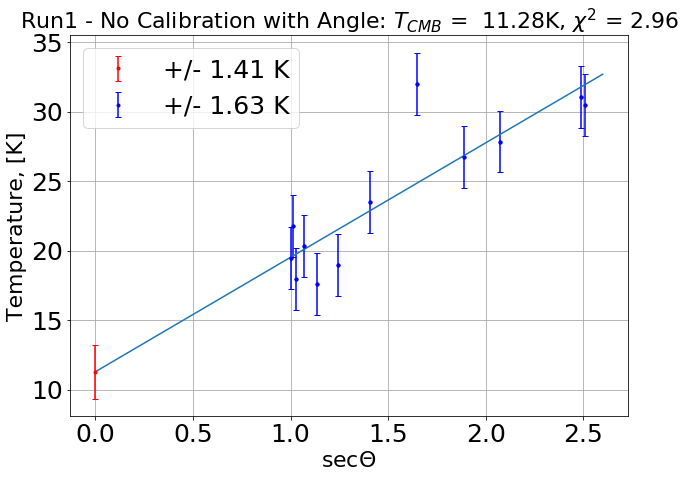

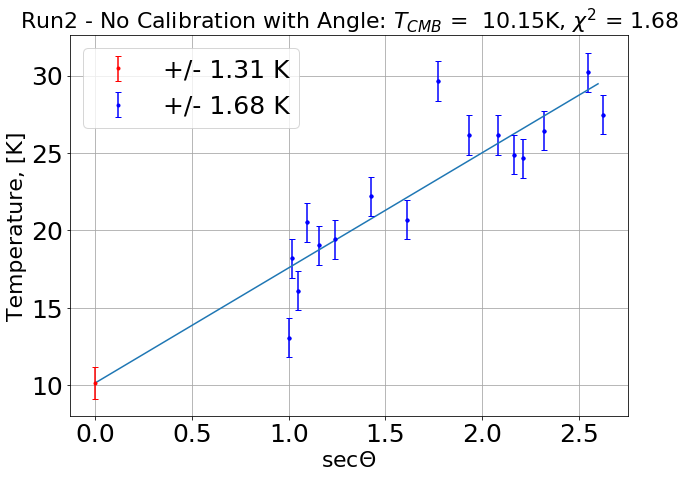

In [32]:
#Data Run 1 with 75/25
sectheta1 = 1/numpy.cos(dfr1['Angle']*numpy.pi/180)
T_r1__7525 = dfr1['Power(uW)']*alpha7525 + beta7525
T_err_r1_7525 = [err7525]*len(dfr1['Angle'])

plt.figure(0, figsize=(10,7))
plt.plot(sectheta1, T_r1__7525,'.b', label = '_nolegend_')
plt.xlabel("sec"+r"$\Theta$", size=22)
plt.ylabel("Temperature, [K]", size=22)
plt.title("Run1 - No Calibration with Angle:"+" $T_{CMB}$ =  11.28K, $\chi^2$ = 2.96" , size=22)
plt.xticks(size=25)
plt.yticks(size=25)

plt.grid(b=True, which='both', color='0.65', linestyle='-')

pguess_r1_7525 = [10., 6.]
params_r1_7525, cov_r1_7525 = curve_fit(f = myline, 
                            xdata=sectheta1,
                                ydata=T_r1__7525,sigma=T_err_r1_7525, absolute_sigma = True,
                            p0= pguess_r1_7525)

print(params_r1_7525)
Tcmb_error_r1_7525 = numpy.sqrt(numpy.diag(cov_r1_7525))
print(Tcmb_error_r1_7525)
x=numpy.linspace(0,2.6,100)
plt.plot(x, params_r1_7525[0]*x + params_r1_7525[1], linestyle='solid')
plt.errorbar(0, params_r1_7525[1], yerr=Tcmb_error_r1_7525[1], fmt='.r', capsize = 3, label = "+/- 1.41 K")

plt.errorbar(sectheta1, T_r1__7525, yerr=T_err_r1_7525, fmt='.b', capsize = 3, label = "+/- 1.63 K")
plt.legend(loc="best", prop={'size': 25})

T_chisquare7525 = mychisquare(T_r1__7525, myline(sectheta1, *params_r1_7525), T_err_r1_7525)
red_T_chisquare7525 = T_chisquare7525/(len(dfr1['Angle'])-2) #16-4 for 2 degrees of freedom
print(red_T_chisquare7525)



#Data Run 2 with 2575, without first 3 points
sectheta2 = 1/numpy.cos(dfr2['Angle']*numpy.pi/180)
T_r2__2575 = dfr2['Cold(uW)']*alpha2575 + beta2575
T_err_r2_2575 = [err2575]*len(dfr2['Angle'])

#Cold(uW)  Warm(uW)  Warm_T

plt.figure(1, figsize=(10,7))
plt.plot(sectheta2, T_r2__2575,'.b', label = '_nolegend_')
plt.xlabel("sec"+r"$\Theta$", size=22)
plt.ylabel("Temperature, [K]", size=22)
plt.title("Run2 - No Calibration with Angle:"+" $T_{CMB}$ =  10.15K, $\chi^2$ = 1.68" , size=22)
plt.xticks(size=25)
plt.yticks(size=25)


plt.grid(b=True, which='both', color='0.65', linestyle='-')

pguess_r2_2575 = [10., 6.]
params_r2_2575, cov_r2_2575 = curve_fit(f = myline, 
                            xdata=sectheta2,
                                ydata=T_r2__2575,sigma=T_err_r2_2575, absolute_sigma = True,
                            p0= pguess_r2_2575)

print(params_r2_2575)
Tcmb_error_r2_2575 = numpy.sqrt(numpy.diag(cov_r2_2575))
print(Tcmb_error_r2_2575)
x=numpy.linspace(0,2.6,100)
plt.plot(x, params_r2_2575[0]*x + params_r2_2575[1], linestyle='solid')
plt.errorbar(0, params_r2_2575[1], yerr=Tcmb_error_r2_2575[1], fmt='.r', capsize = 3, label = "+/- 1.31 K")

plt.errorbar(sectheta2, T_r2__2575, yerr=T_err_r2_2575, fmt='.b', capsize = 3, label = "+/- 1.68 K")
plt.legend(loc="best", prop={'size': 25})

T_chisquare2575 = mychisquare_remove8(T_r2__2575, myline(sectheta2, *params_r2_2575), T_err_r2_2575)
red_T_chisquare2575 = T_chisquare2575/(len(dfr2['Angle'])-2-3) #16-4 for 2 degrees of freedom
print(red_T_chisquare2575)




In the second data run, we ”chop” to the reference load at each angle. 
In other words, the measurement of the sky signal is calibrated to the power and temperatures of the reference load at each angle. Because β only changes by 0.46% while α changes by 1.6%, we assume that beta is constant. Then for each angle, we measure alpha using
α = (T - β) / P
I use this alpha to convert the sky power measurements for that angle to Temperature.
I do this for various weighting of β1 and β2. β1 is the beta from the first calibration and β2 is the beta from the second calibration.


Using the averaged of the beta values again, TCMB = 12.09 ± 1.74 ± 5.41 K with χ2 = 7.48.
Weighting β1 by 25% and β2 by 75%, TCMB = 11.99 ± 1.34 ± 5.41 K with χ2 = 3.37. 
Weighting β1 by 0% and β2 by 100%, TCMB =11.89 ± 1.42 ± 5.41 K withχ 2 =3 .01.

Unfortunately, we did not measure the first 3 temperatures for the cold T of data run 2. This makes the cmb temp higher. We make a few plots were approximate what the first 3 temperatures are by using the calibration curves.
For β1 by 50% and β2 by 50%, TCMB = 8.09 ± 1.31 ± 5.41 K

387.48980315866436
386.36506344672006
383.817086078861
387.54333183944516
394.79728242693653
389.7667027188396
396.32078240493706
393.6421467638443
397.02357194578695
396.33544951589647
400.0111914602951
388.5769230146832
395.26059346983135
[ 8.75298037 12.08980683]
[0.90171059 1.73731164]
7.481847458892329
[22.49304211601364, 20.526312300357432, 19.87819855245337, 24.220120653678492, 25.638989301780924, 32.7005138708777, 31.929945031167136, 30.795274973600243, 30.91746889325006, 30.390449766257547, 33.773210141039016, 32.76856157741122, 32.82473501605381]


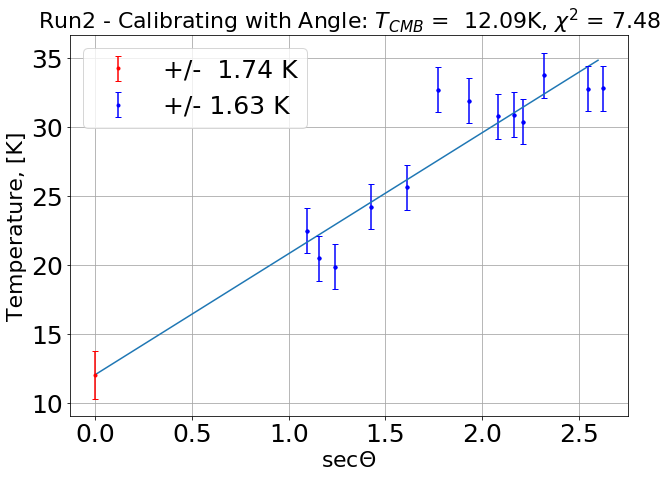

In [46]:
#BETA CONSTANT CHOP 5050 for DATA RUN 2 NO 3 POINTS

alphas=[]
T_r2_5050_beta_no3=[]
T_err_r2_5050_beta_no3 = [err]*len(dfr2['Angle'])
plt.figure(1, figsize=(10,7))


#sectheta_remove8 = sectheta[~sectheta.index.isin([8])]
for i in range(3,len(dfr2['Angle'])):
    #if i==8:
    #    continue
    alpha=(dfr2['Warm_T'][i]-beta5050)/dfr2['Warm(uW)'][i] #use warm load to calibrate
    print(alpha)
    alphas.append(alpha)
    T_r2_5050_beta_no3.append(dfr2['Cold(uW)'][i]*alpha+beta5050)
     
plt.plot(sectheta[3:], T_r2_5050_beta_no3, '.b')
pguess_r2_5050_beta_no3 = [15.5,10.]
params_r2_5050_beta_no3, cov_r2_5050_beta_no3 = curve_fit(f = myline, 
                            xdata=sectheta[3:],
                                ydata=T_r2_5050_beta_no3,sigma=T_err_r2_5050_beta_no3[3:], absolute_sigma=True,
                            p0= pguess_r2_5050_beta_no3)

print(params_r2_5050_beta_no3)
Tcmb_error_r2_5050_beta_no3 = numpy.sqrt(numpy.diag(cov_r2_5050_beta_no3))
print(Tcmb_error_r2_5050_beta_no3)

x=numpy.linspace(0,2.6,100)
plt.plot(x, params_r2_5050_beta_no3[0]*x + params_r2_5050_beta_no3[1], linestyle='solid')
plt.errorbar(0, params_r2_5050_beta_no3[1], yerr=Tcmb_error_r2_5050_beta_no3[1], 
             fmt='.r', capsize = 3, label = "+/-  1.74 K")

plt.errorbar(sectheta[3:], T_r2_5050_beta_no3, yerr=T_err_r2_5050_beta_no3[3:], fmt='.b', 
             capsize = 3, label = "+/- 1.63 K")
plt.legend(loc="best", prop={'size': 25})
    
T_chisquare_r2_5050_beta_no3 = mychisquare_index3(T_r2_5050_beta_no3, 
                                                  myline(sectheta[3:], *params_r2_5050_beta_no3), 
                                                  T_err_r2_5050_beta_no3[3:])
red_T_chisquare_r2_5050_beta_no3 = T_chisquare_r2_5050_beta_no3/(len(dfr2['Angle'])-2-3) #16-2-3 for 2 degrees of freedom
print(red_T_chisquare_r2_5050_beta_no3)



plt.xlabel("sec"+r"$\Theta$", size=22)
plt.ylabel("Temperature, [K]", size=22)
plt.title("Run2 - Calibrating with Angle:"+" $T_{CMB}$ =  12.09K, $\chi^2$ = 7.48" , size=22)
plt.xticks(size=25)
plt.yticks(size=25)


plt.grid(b=True, which='both', color='0.65', linestyle='-')


[]
387.48980315866436
386.36506344672006
383.817086078861
387.54333183944516
394.79728242693653
389.7667027188396
396.32078240493706
393.6421467638443
397.02357194578695
396.33544951589647
400.0111914602951
388.5769230146832
395.26059346983135
[10.6050559   8.09316552]
[0.73007318 1.30842543]
2.7907499556742867


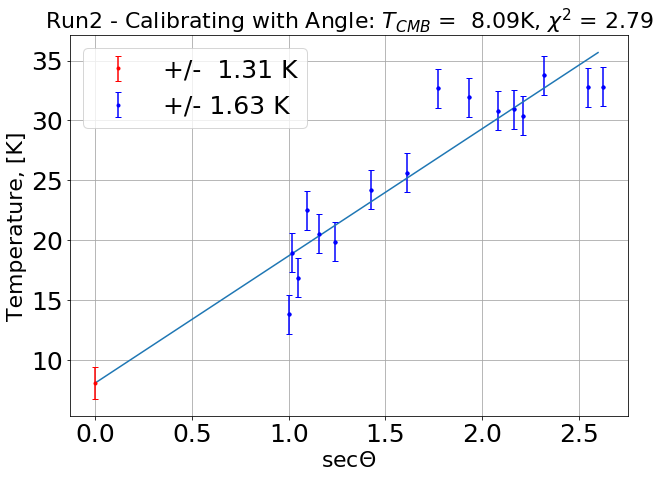

In [35]:
#BETA CONSTANT CHOP 5050 for DATA RUN 2 YES 3 POINTS

alphas=[]
print(alphas)
T_r2_5050_beta_yes3=[]
T_err_r2_5050_beta_yes3 = [err]*len(dfr2['Angle'])
plt.figure(1, figsize=(10,7))
#Use calibration curve to make first three data points
for i in range(0,3):
    T_r2_5050_beta_yes3.append(((dfr2['Cold(uW)'][i]*alpha5050) + beta5050))


#sectheta_remove8 = sectheta[~sectheta.index.isin([8])]
for i in range(3,len(dfr2['Angle'])):
    #if i==8:
    #    continue
    alpha=(dfr2['Warm_T'][i]-beta5050)/dfr2['Warm(uW)'][i] #use warm load to calibrate
    print(alpha)
    alphas.append(alpha)
    T_r2_5050_beta_yes3.append(dfr2['Cold(uW)'][i]*alpha+beta5050)
     
plt.plot(sectheta, T_r2_5050_beta_yes3, '.b')
pguess_r2_5050_beta_yes3 = [15.5,10.]
params_r2_5050_beta_yes3, cov_r2_5050_beta_yes3 = curve_fit(f = myline, 
                            xdata=sectheta,
                                ydata=T_r2_5050_beta_yes3,sigma=T_err_r2_5050_beta_yes3, absolute_sigma=True,
                            p0= pguess_r2_5050_beta_yes3)

print(params_r2_5050_beta_yes3)
Tcmb_error_r2_5050_beta_yes3 = numpy.sqrt(numpy.diag(cov_r2_5050_beta_yes3))
print(Tcmb_error_r2_5050_beta_yes3)

x=numpy.linspace(0,2.6,100)
plt.plot(x, params_r2_5050_beta_yes3[0]*x + params_r2_5050_beta_yes3[1], linestyle='solid')
plt.errorbar(0, params_r2_5050_beta_yes3[1], yerr=Tcmb_error_r2_5050_beta_yes3[1], 
             fmt='.r', capsize = 3, label = "+/-  1.31 K")

plt.errorbar(sectheta, T_r2_5050_beta_yes3, yerr=T_err_r2_5050_beta_yes3, 
             fmt='.b', capsize = 3, label = "+/- 1.63 K")
plt.legend(loc="best", prop={'size': 25})
T_chisquare_r2_5050_beta_yes3 = mychisquare(T_r2_5050_beta_yes3, 
                                                  myline(sectheta, *params_r2_5050_beta_yes3), 
                                                   T_err_r2_5050_beta_yes3)
red_T_chisquare_r2_5050_beta_yes3 = T_chisquare_r2_5050_beta_yes3/(len(dfr2['Angle'])-2) #16-4 for 2 degrees of freedom
print(red_T_chisquare_r2_5050_beta_yes3)

plt.xlabel("sec"+r"$\Theta$", size=22)
plt.ylabel("Temperature, [K]", size=22)
plt.title("Run2 - Calibrating with Angle:"+" $T_{CMB}$ =  8.09K, $\chi^2$ = 2.79" , size=22)
plt.xticks(size=25)
plt.yticks(size=25)


plt.grid(b=True, which='both', color='0.65', linestyle='-')


[]
387.6340690094055
386.50892781550175
383.96002229042483
387.6877320159319
394.94456237902267
389.91232317850785
396.4690479781175
393.78956671588486
397.17254964948216
396.48428424674745
400.16161414656733
388.72323036331215
395.40942820068227
[10.88110264  7.40444323]
[0.56581683 1.01404783]
5.100998045582139


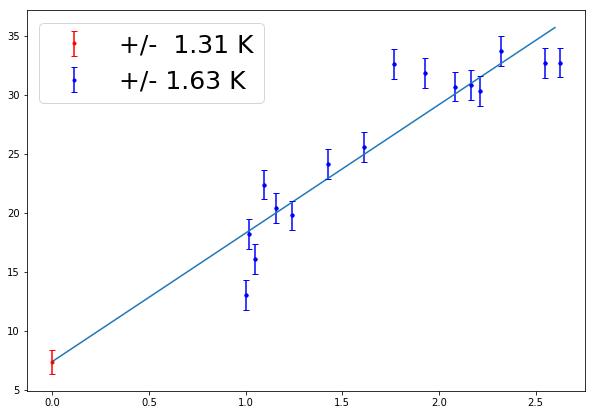

In [36]:
#BETA CONSTANT CHOP 2575 for DATA RUN 2 YES 3 POINTS
alphas=[]
print(alphas)
T_r2_2575_beta_yes3=[]
T_err_r2_2575_beta_yes3 = [err2575]*len(dfr2['Angle'])
plt.figure(1, figsize=(10,7))
#Use calibration curve to make first three data points
for i in range(0,3):
    T_r2_2575_beta_yes3.append(((dfr2['Cold(uW)'][i]*alpha2575) + beta2575))


#sectheta_remove8 = sectheta[~sectheta.index.isin([8])]
for i in range(3,len(dfr2['Angle'])):
    #if i==8:
    #    continue
    alpha=(dfr2['Warm_T'][i]-beta2575)/dfr2['Warm(uW)'][i] #use warm load to calibrate
    print(alpha)
    alphas.append(alpha)
    T_r2_2575_beta_yes3.append(dfr2['Cold(uW)'][i]*alpha+beta2575)
     
plt.plot(sectheta, T_r2_2575_beta_yes3, '.b')
pguess_r2_2575_beta_yes3 = [15.5,10.]
params_r2_2575_beta_yes3, cov_r2_2575_beta_yes3 = curve_fit(f = myline, 
                            xdata=sectheta,
                                ydata=T_r2_2575_beta_yes3,sigma=T_err_r2_2575_beta_yes3, absolute_sigma=True,
                            p0= pguess_r2_2575_beta_yes3)

print(params_r2_2575_beta_yes3)
Tcmb_error_r2_2575_beta_yes3 = numpy.sqrt(numpy.diag(cov_r2_2575_beta_yes3))
print(Tcmb_error_r2_2575_beta_yes3)

x=numpy.linspace(0,2.6,100)
plt.plot(x, params_r2_2575_beta_yes3[0]*x + params_r2_2575_beta_yes3[1], linestyle='solid')
plt.errorbar(0, params_r2_2575_beta_yes3[1], yerr=Tcmb_error_r2_2575_beta_yes3[1], 
             fmt='.r', capsize = 3, label = "+/-  1.31 K")

plt.errorbar(sectheta, T_r2_2575_beta_yes3, yerr=T_err_r2_2575_beta_yes3, 
             fmt='.b', capsize = 3, label = "+/- 1.63 K")
plt.legend(loc="best", prop={'size': 25})
T_chisquare_r2_2575_beta_yes3 = mychisquare(T_r2_2575_beta_yes3, 
                                                  myline(sectheta, *params_r2_2575_beta_yes3), 
                                                   T_err_r2_2575_beta_yes3)
red_T_chisquare_r2_2575_beta_yes3 = T_chisquare_r2_2575_beta_yes3/(len(dfr2['Angle'])-2) #16-4 for 2 degrees of freedom
print(red_T_chisquare_r2_2575_beta_yes3)




[]
387.6340690094055
386.50892781550175
383.96002229042483
387.6877320159319
394.94456237902267
389.91232317850785
396.4690479781175
393.78956671588486
397.17254964948216
396.48428424674745
400.16161414656733
388.72323036331215
395.40942820068227
[ 8.75675486 11.98919883]
[0.6988382  1.34644059]
3.3662811359222684


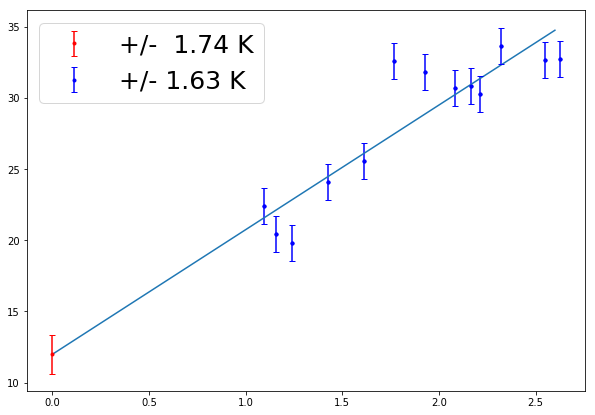

In [37]:
#BETA CONSTANT CHOP 2575 for DATA RUN 2 NO 3 POINTS
alphas=[]
print(alphas)
T_r2_2575_beta_yes3=[]
T_err_r2_2575_beta_yes3 = [err2575]*len(dfr2['Angle'])
plt.figure(1, figsize=(10,7))
#Use calibration curve to make first three data points
for i in range(0,3):
    T_r2_2575_beta_yes3.append(((dfr2['Cold(uW)'][i]*alpha2575) + beta2575))


#sectheta_remove8 = sectheta[~sectheta.index.isin([8])]
for i in range(3,len(dfr2['Angle'])):
    #if i==8:
    #    continue
    alpha=(dfr2['Warm_T'][i]-beta2575)/dfr2['Warm(uW)'][i] #use warm load to calibrate
    print(alpha)
    alphas.append(alpha)
    T_r2_2575_beta_yes3.append(dfr2['Cold(uW)'][i]*alpha+beta2575)
     
plt.plot(sectheta[3:], T_r2_2575_beta_yes3[3:], '.b')
pguess_r2_2575_beta_yes3 = [15.5,10.]
params_r2_2575_beta_yes3, cov_r2_2575_beta_yes3 = curve_fit(f = myline, 
                            xdata=sectheta[3:],
                                ydata=T_r2_2575_beta_yes3[3:],
                                sigma=T_err_r2_2575_beta_yes3[3:], absolute_sigma=True,
                            p0= pguess_r2_2575_beta_yes3)

print(params_r2_2575_beta_yes3)
Tcmb_error_r2_2575_beta_yes3 = numpy.sqrt(numpy.diag(cov_r2_2575_beta_yes3))
print(Tcmb_error_r2_2575_beta_yes3)

x=numpy.linspace(0,2.6,100)
plt.plot(x, params_r2_2575_beta_yes3[0]*x + params_r2_2575_beta_yes3[1], linestyle='solid')
plt.errorbar(0, params_r2_2575_beta_yes3[1], yerr=Tcmb_error_r2_2575_beta_yes3[1], 
             fmt='.r', capsize = 3, label = "+/-  1.74 K")

plt.errorbar(sectheta[3:], T_r2_2575_beta_yes3[3:], yerr=T_err_r2_2575_beta_yes3[3:], 
             fmt='.b', capsize = 3, label = "+/- 1.63 K")
plt.legend(loc="best", prop={'size': 25})
T_chisquare_r2_2575_beta_yes3 = mychisquare_index3(T_r2_2575_beta_yes3, 
                                                  myline(sectheta, *params_r2_2575_beta_yes3), 
                                                   T_err_r2_2575_beta_yes3)
red_T_chisquare_r2_2575_beta_yes3 = T_chisquare_r2_2575_beta_yes3/(len(dfr2['Angle'])-2-3) #16-4 for 2 degrees of freedom
print(red_T_chisquare_r2_2575_beta_yes3)





[]
387.77833486014663
386.65279218428344
384.1029585019886
387.8321321924186
395.09184233110886
390.05794363817614
396.6173135512979
393.93698666792545
397.3215273531774
396.63311897759843
400.3120368328395
388.86953771194106
395.5582629315332
[11.1571492   6.71572119]
[0.59828057 1.07222883]
5.025596462623294


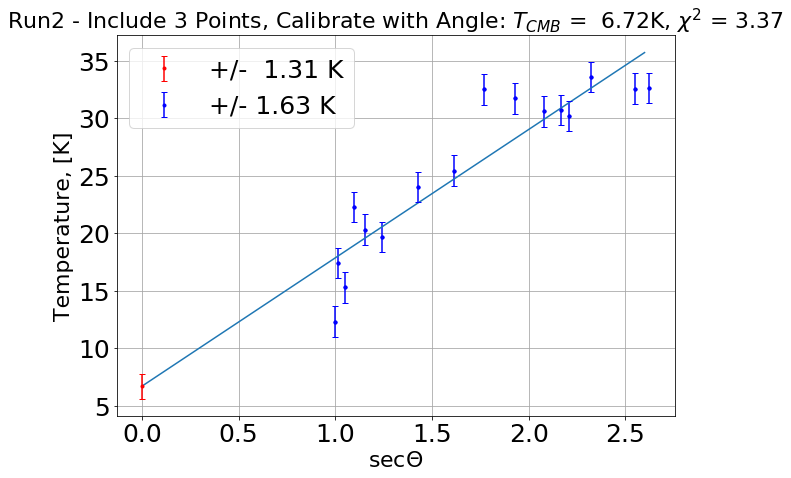

In [38]:
#BETA CONSTANT CHOP 0100 for DATA RUN 2 YES 3 POINTS
beta0100=paramsc2[1]
alpha0100 = paramsc2[0]
alphas=[]
print(alphas)
T_r2_0100_beta_yes3=[]
T_err_r2_0100_beta_yes3 = [err0100]*len(dfr2['Angle'])
plt.figure(1, figsize=(10,7))
#Use calibration curve to make first three data points
for i in range(0,3):
    T_r2_0100_beta_yes3.append(((dfr2['Cold(uW)'][i]*alpha0100) + beta0100))


#sectheta_remove8 = sectheta[~sectheta.index.isin([8])]
for i in range(3,len(dfr2['Angle'])):
    #if i==8:
    #    continue
    alpha=(dfr2['Warm_T'][i]-beta0100)/dfr2['Warm(uW)'][i] #use warm load to calibrate
    print(alpha)
    alphas.append(alpha)
    T_r2_0100_beta_yes3.append(dfr2['Cold(uW)'][i]*alpha+beta0100)
     
plt.plot(sectheta, T_r2_0100_beta_yes3, '.b')
pguess_r2_0100_beta_yes3 = [15.5,10.]
params_r2_0100_beta_yes3, cov_r2_0100_beta_yes3 = curve_fit(f = myline, 
                            xdata=sectheta,
                                ydata=T_r2_0100_beta_yes3,sigma=T_err_r2_0100_beta_yes3, absolute_sigma=True,
                            p0= pguess_r2_0100_beta_yes3)

print(params_r2_0100_beta_yes3)
Tcmb_error_r2_0100_beta_yes3 = numpy.sqrt(numpy.diag(cov_r2_0100_beta_yes3))
print(Tcmb_error_r2_0100_beta_yes3)

x=numpy.linspace(0,2.6,100)
plt.plot(x, params_r2_0100_beta_yes3[0]*x + params_r2_0100_beta_yes3[1], linestyle='solid')
plt.errorbar(0, params_r2_0100_beta_yes3[1], yerr=Tcmb_error_r2_0100_beta_yes3[1], 
             fmt='.r', capsize = 3, label = "+/-  1.31 K")

plt.errorbar(sectheta, T_r2_0100_beta_yes3, yerr=T_err_r2_0100_beta_yes3, 
             fmt='.b', capsize = 3, label = "+/- 1.63 K")
plt.legend(loc="best", prop={'size': 25})
T_chisquare_r2_0100_beta_yes3 = mychisquare(T_r2_0100_beta_yes3, 
                                                  myline(sectheta, *params_r2_0100_beta_yes3), 
                                                   T_err_r2_0100_beta_yes3)
red_T_chisquare_r2_0100_beta_yes3 = T_chisquare_r2_0100_beta_yes3/(len(dfr2['Angle'])-2) #16-4 for 2 degrees of freedom
print(red_T_chisquare_r2_0100_beta_yes3)

plt.xlabel("sec"+r"$\Theta$", size=22)
plt.ylabel("Temperature, [K]", size=22)
plt.title("Run2 - Include 3 Points, Calibrate with Angle: $T_{CMB}$ =  6.72K, $\chi^2$ = 3.37" , size=22)
plt.xticks(size=25)
plt.yticks(size=25)


plt.grid(b=True, which='both', color='0.65', linestyle='-')



[]
387.77833486014663
386.65279218428344
384.1029585019886
387.8321321924186
395.09184233110886
390.05794363817614
396.6173135512979
393.93698666792545
397.3215273531774
396.63311897759843
400.3120368328395
388.86953771194106
395.5582629315332
[ 8.76052923 11.88859107]
[0.73893402 1.42369256]
3.0130647147964607


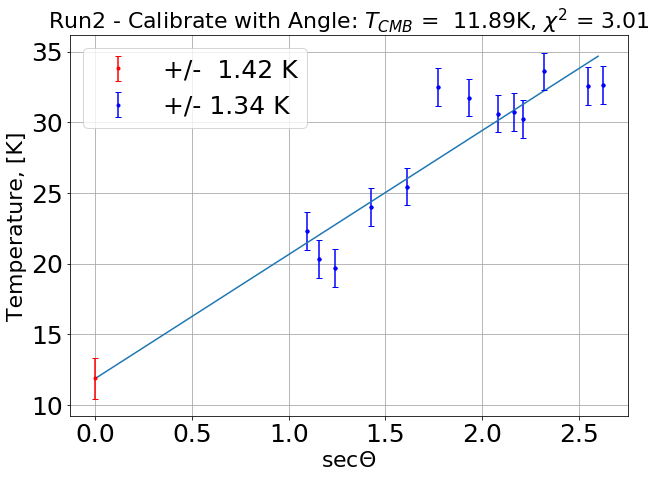

In [39]:
#BETA CONSTANT CHOP 0100 for DATA RUN 2 NO 3 POINTS
beta0100=paramsc2[1]
alpha0100 = paramsc2[0]
alphas=[]
print(alphas)
T_r2_0100_beta_yes3=[]
T_err_r2_0100_beta_yes3 = [err0100]*len(dfr2['Angle'])
plt.figure(1, figsize=(10,7))
#Use calibration curve to make first three data points
for i in range(0,3):
    T_r2_0100_beta_yes3.append(((dfr2['Cold(uW)'][i]*alpha0100) + beta0100))


#sectheta_remove8 = sectheta[~sectheta.index.isin([8])]
for i in range(3,len(dfr2['Angle'])):
    #if i==8:
    #    continue
    alpha=(dfr2['Warm_T'][i]-beta0100)/dfr2['Warm(uW)'][i] #use warm load to calibrate
    print(alpha)
    alphas.append(alpha)
    T_r2_0100_beta_yes3.append(dfr2['Cold(uW)'][i]*alpha+beta0100)
     
plt.plot(sectheta[3:], T_r2_0100_beta_yes3[3:], '.b')
pguess_r2_0100_beta_yes3 = [15.5,10.]
params_r2_0100_beta_yes3, cov_r2_0100_beta_yes3 = curve_fit(f = myline, 
                            xdata=sectheta[3:],
                                ydata=T_r2_0100_beta_yes3[3:],sigma=T_err_r2_0100_beta_yes3[3:], absolute_sigma=True,
                            p0= pguess_r2_0100_beta_yes3)

print(params_r2_0100_beta_yes3)
Tcmb_error_r2_0100_beta_yes3 = numpy.sqrt(numpy.diag(cov_r2_0100_beta_yes3))
print(Tcmb_error_r2_0100_beta_yes3)

x=numpy.linspace(0,2.6,100)
plt.plot(x, params_r2_0100_beta_yes3[0]*x + params_r2_0100_beta_yes3[1], linestyle='solid')
plt.errorbar(0, params_r2_0100_beta_yes3[1], yerr=Tcmb_error_r2_0100_beta_yes3[1], 
             fmt='.r', capsize = 3, label = "+/-  1.42 K")

plt.errorbar(sectheta[3:], T_r2_0100_beta_yes3[3:], yerr=T_err_r2_0100_beta_yes3[3:], 
             fmt='.b', capsize = 3, label = "+/- 1.34 K")
plt.legend(loc="best", prop={'size': 25})
T_chisquare_r2_0100_beta_yes3 = mychisquare_index3(T_r2_0100_beta_yes3, 
                                                  myline(sectheta, *params_r2_0100_beta_yes3), 
                                                   T_err_r2_0100_beta_yes3)
red_T_chisquare_r2_0100_beta_yes3 = T_chisquare_r2_0100_beta_yes3/(len(dfr2['Angle'])-2-3) #16-4 for 2 degrees of freedom
print(red_T_chisquare_r2_0100_beta_yes3)

plt.xlabel("sec"+r"$\Theta$", size=22)
plt.ylabel("Temperature, [K]", size=22)
plt.title("Run2 - Calibrate with Angle: $T_{CMB}$ =  11.89K, $\chi^2$ = 3.01" , size=22)
plt.xticks(size=25)
plt.yticks(size=25)


plt.grid(b=True, which='both', color='0.65', linestyle='-')




In [50]:
#T_receiver

T_rcvr = []
for i in range(0,len(T_r2_5050_beta_no3)):
    T_rcvr.append( ((dfr2['Warm_T'][i+3]*dfr2['Cold(uW)'][i+3])  -  (T_r2_5050_beta_no3[i]*dfr2['Warm(uW)'][i+3]))/(dfr2['Warm(uW)'][i+3]-dfr2['Cold(uW)'][i+3]))

T_rcvr_avg = sum(T_rcvr)/len(T_rcvr)
T_rcvr_avg #135.95153839556423
#Temperature of the receiver is what we expect. Matches up with Beta and Plot w Noise Temperature

135.95153839556423